<a href="https://colab.research.google.com/github/nouranali/playing-with-datasets/blob/master/googlelabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='mean_squared_error')

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [ ]:
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 236ms/step - loss: 39.5074
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 31.0864
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 24.4611
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 19.2486
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 15.1475
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 11.9209
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 9.3823
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 7.3850
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5.8135
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 4.5771
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 3.6043
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 2.8389
Epoch 13/500
1/1 [==============================] - 0

In [ ]:
print(model.predict([10.0]))

[[31.002344]]


In [ ]:
mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

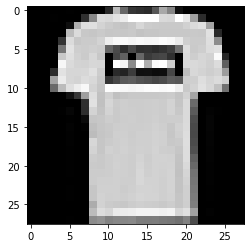

In [ ]:
plt.imshow(training_images[1])

In [ ]:
print(training_labels[1])

0


In [ ]:
training_images = training_images/255.0
test_images = test_images / 255.0

In [ ]:
model = keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6324 - accuracy: 0.7806
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3819 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3441 - accuracy: 0.8740
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3161 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.8920


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8696


[0.36356133222579956, 0.8695999979972839]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

[5.0227147e-08 2.8853698e-08 2.6294652e-08 5.6976319e-07 1.9751576e-07
 3.6135126e-02 9.5156620e-06 3.6536295e-02 1.5031582e-05 9.2730319e-01]


In [ ]:
print(test_labels[0])

9


In [ ]:
np.max(classifications)

1.0

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import cv2
from scipy import misc

In [ ]:
i=misc.ascent()

In [ ]:
i

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

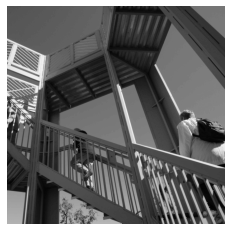

In [ ]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i);

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [ ]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

In [ ]:
weight=1

In [ ]:
for x in range(1,size_x - 1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

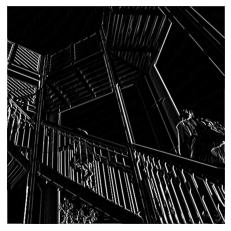

In [ ]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i_transformed);

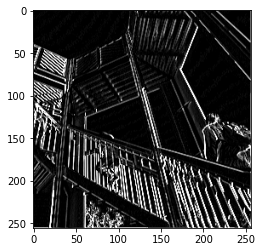

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.6302 - accuracy: 0.7749
Epoch 2/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3211 - accuracy: 0.8821
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2706 - accuracy: 0.9002
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2347 - accuracy: 0.9127
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.2736 - accuracy: 0.9023
Test loss: 0.27356064319610596, Test accuracy: 90.23000001907349


In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


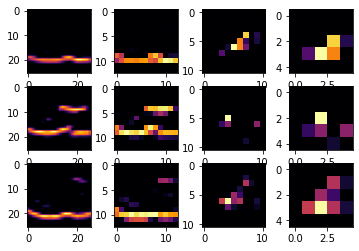

In [ ]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
#new lab

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2021-01-25 13:09:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   157MB/s    in 0.9s    

2021-01-25 13:09:22 (157 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse09-4.png', 'horse43-9.png', 'horse02-1.png', 'horse42-6.png', 'horse26-9.png', 'horse49-8.png', 'horse24-2.png', 'horse15-2.png', 'horse48-7.png', 'horse07-3.png']
['human11-27.png', 'human09-24.png', 'human15-23.png', 'human15-27.png', 'human13-15.png', 'human04-27.png', 'human06-11.png', 'human05-06.png', 'human12-18.png', 'human17-10.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [ ]:
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

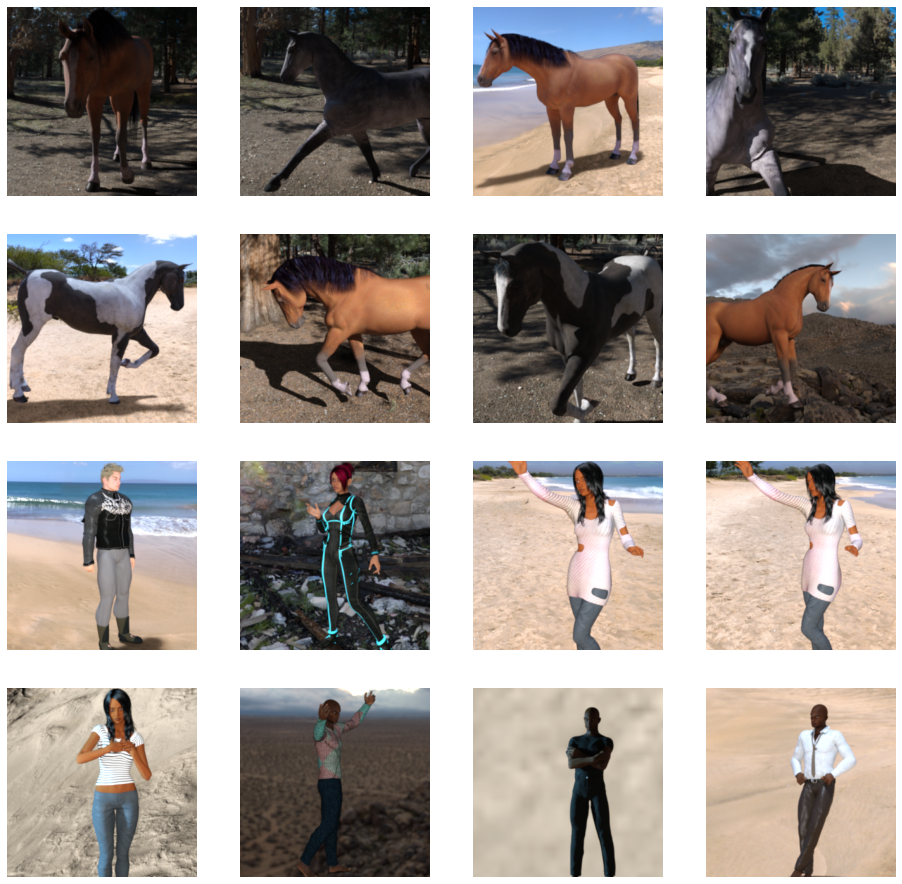

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=2)

Epoch 1/15
8/8 - 73s - loss: 0.7794 - acc: 0.4972
Epoch 2/15
8/8 - 82s - loss: 0.7057 - acc: 0.6289
Epoch 3/15
8/8 - 72s - loss: 0.6325 - acc: 0.6885
Epoch 4/15
8/8 - 72s - loss: 0.5257 - acc: 0.7742
Epoch 5/15
8/8 - 83s - loss: 1.2878 - acc: 0.6787
Epoch 6/15
8/8 - 72s - loss: 0.4071 - acc: 0.8420
Epoch 7/15
8/8 - 72s - loss: 0.8196 - acc: 0.8610
Epoch 8/15
8/8 - 73s - loss: 0.3887 - acc: 0.8843
Epoch 9/15
8/8 - 73s - loss: 0.3786 - acc: 0.8576
Epoch 10/15
8/8 - 73s - loss: 0.2282 - acc: 0.9143
Epoch 11/15
8/8 - 73s - loss: 0.1133 - acc: 0.9666
Epoch 12/15
8/8 - 73s - loss: 0.0227 - acc: 0.9978
Epoch 13/15
8/8 - 74s - loss: 0.1497 - acc: 0.9444
Epoch 14/15
8/8 - 72s - loss: 0.1217 - acc: 0.9588
Epoch 15/15
8/8 - 72s - loss: 0.0134 - acc: 0.9989
